In [1]:
words = open("./names.txt", 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words), max(len(w) for w in words)

(2, 15)

In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [6]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [10]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[ix1, ix2] += 1

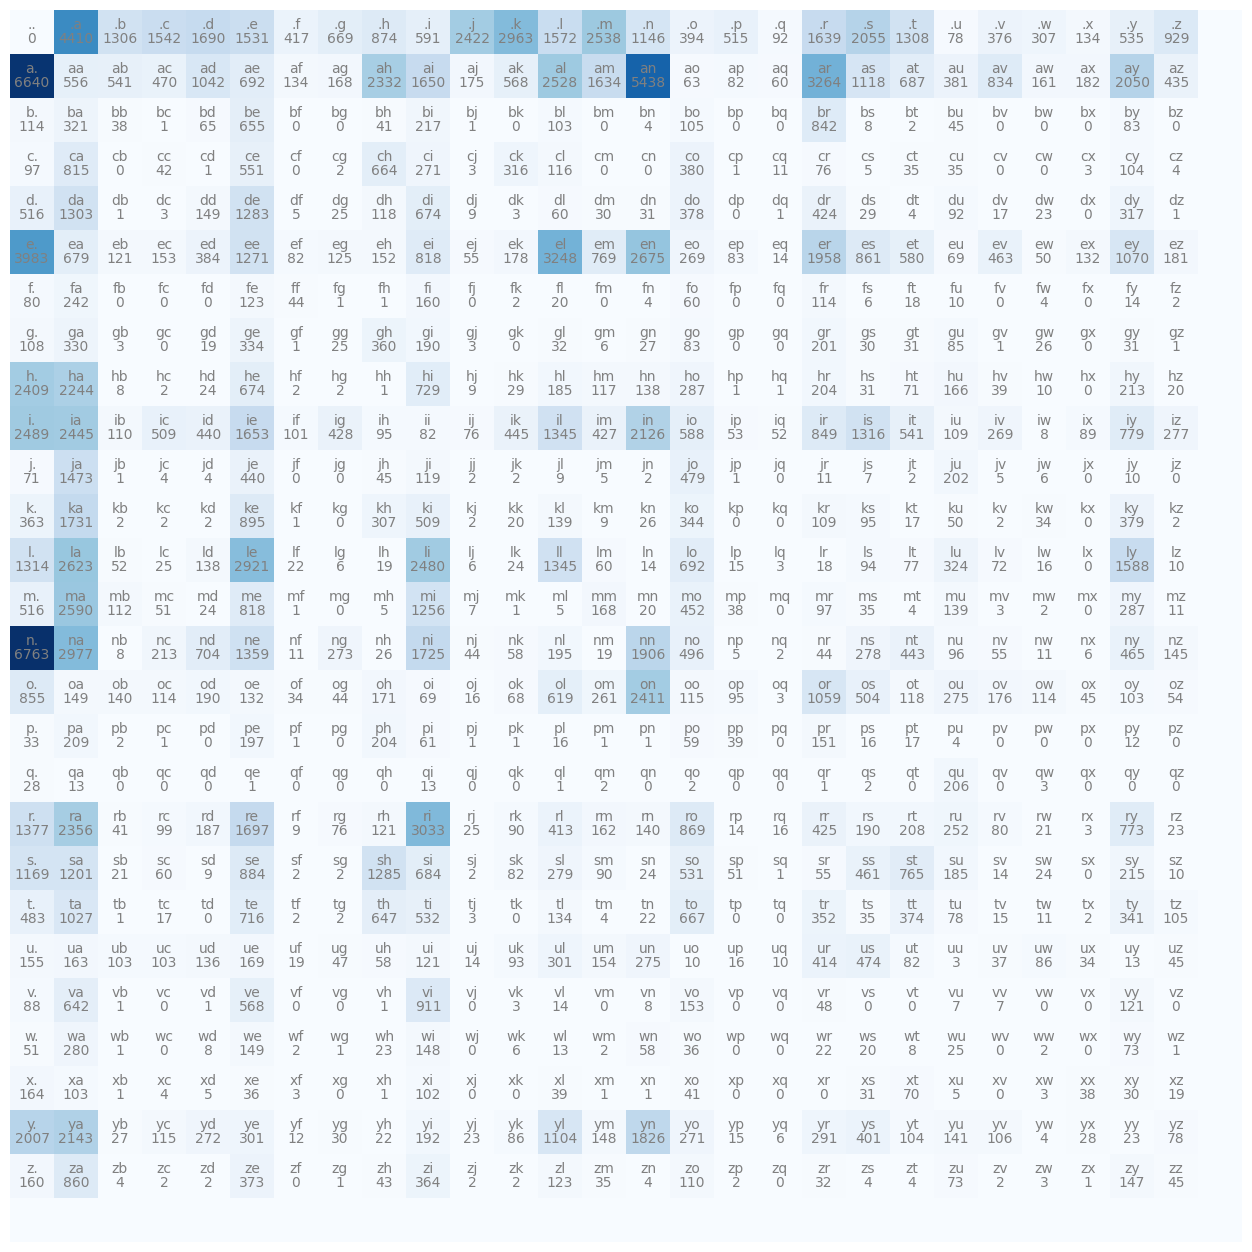

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');

In [12]:
P = N.float()
P /= P.sum(axis=1, keepdim=True)
P[0].sum()

tensor(1.)

In [13]:
g = torch.Generator().manual_seed(2147483647)
p = N[0].float()
p /= p.sum()

torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([13, 19, 14,  1,  1, 20, 20,  1, 13, 13, 13, 11, 23, 13, 19, 18, 26, 11,
         7, 19,  1, 11, 18, 10, 11, 15,  2,  9, 18,  2,  5,  3,  1, 13, 11, 11,
        22, 11, 15, 26,  2, 18, 13, 10,  1, 15,  2,  3, 15, 10, 12,  4,  9,  3,
         4,  6,  4, 19, 10,  3,  8,  4, 10, 13, 14, 13, 10, 19, 11,  8, 13,  5,
         5,  6, 25, 20, 10, 18,  1,  8,  3,  2, 20,  1,  1,  3, 10, 11, 25, 18,
         1,  9, 11,  8, 12,  3, 12, 19,  9, 18])

In [14]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0: # end token
            break
    print("".join(out))

cava.
ayamaijowy.
aianeta.
rl.
miryndardyrioma.
kiinninaswila.
en.
ahlanyanlen.
tav.
sissth.
eygerinan.
sullyukrbrilahubrnidrianelkheyneligalah.
ka.
f.
elah.
m.
ri.
nil.
n.
diyn.


In [15]:
# log(a*b*c) = log(a) + log(b) + log(c)

In [16]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        n += 1
        log_likelihood += logprob

print(f'{log_likelihood=}')
nll = -log_likelihood # negative log likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-38.7856)
nll=tensor(38.7856)
2.424102306365967


In [17]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        n += 1
        log_likelihood += logprob

print(f'{log_likelihood=}')
nll = -log_likelihood # negative log likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
2.454094171524048


In [18]:
# GOAL: maximize likelihood of data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [19]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        n += 1
        log_likelihood += logprob

print(f"{log_likelihood=}")
nll = -log_likelihood  # negative log likelihood
print(f"{nll=}")
print(f"{nll / n}")

log_likelihood=tensor(-inf)
nll=tensor(inf)
inf


In [20]:
# Model smoothing
P = (N+1).float() # as more counts added leads to more uniform dist.
P /= P.sum(1, keepdim=True)

In [21]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        n += 1
        log_likelihood += logprob

print(f"{log_likelihood=}")
nll = -log_likelihood  # negative log likelihood
print(f"{nll=}")
print(f"{nll / n}")

log_likelihood=tensor(-27.8713)
nll=tensor(27.8713)
3.483914852142334


## Neural Nets

In [22]:
# create the training set of bigrams (x, y)

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [23]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()

In [24]:
# W = randn(27, 27)
# logits = ( xenc @ W ) # log counts
# counts = logits.expt() # equivalent to N
# probs = counts / counts.sum(1, keepdim=True)

In [25]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [26]:
logits = xenc @ W # logits are also called as logcounts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # prob. of next char
# btw: the last 2 lines here are together called as 'softmax'

In [27]:
probs.shape

torch.Size([228146, 27])

In [28]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()  # input character index
    y = ys[i].item()  # label character index
    print("--------")
    print(f"bigram example {i + 1}: {itos[x]}{itos[y]} (indexes {x},{y})")
    print("input to the neural net:", x)
    print("output probabilities from the neural net:", probs[i])
    print("label (actual next character):", y)
    p = probs[i, y]
    print("probability assigned by the net to the the correct character:", p.item())
    logp = torch.log(p)
    print("log likelihood:", logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("=========")
print("average negative log likelihood, i.e. loss =", nlls.mean().item())


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [29]:
# create the training set of bigrams (x, y)

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("num of samples: ", num)

num of samples:  228146


In [30]:
xenc = F.one_hot(xs, num_classes=27).float()

In [31]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [32]:
# gradient descent
for k in range(1000):
    # forward pass
    logits = xenc @ W  # predict log-counts
    counts = logits.exp()  # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() # + 0.01 * (W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None  # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

3.758953332901001
3.371100664138794
3.154043197631836
3.020373582839966
2.927711248397827
2.8604023456573486
2.8097290992736816
2.7701025009155273
2.7380731105804443
2.711496353149414
2.6890029907226562
2.6696884632110596
2.6529300212860107
2.638277292251587
2.6253881454467773
2.613990545272827
2.60386323928833
2.5948216915130615
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612881183624268
2.5562589168548584
2.551633596420288
2.547366142272949
2.543415069580078
2.5397486686706543
2.5363364219665527
2.5331544876098633
2.5301806926727295
2.5273969173431396
2.5247862339019775
2.522334575653076
2.520028829574585
2.517857789993286
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.5042612552642822
2.502929210662842
2.5016613006591797
2.5004520416259766
2.4992988109588623
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173692703247
2.4942495822906494
2.493363380432129
2

In [33]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # ----------
        # BEFORE:
        # p = P[ix]
        # ----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W  # predict log-counts
        counts = logits.exp()  # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True)  # probabilities for next character
        # ----------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
